<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n20.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,81.988951,32.799167,0.000597,124.788715,124.788380,0.000336
1,0.0,1.0,78.043804,86.487319,0.000148,174.531271,174.530983,0.000289
2,0.0,2.0,90.601126,36.052182,0.000448,136.653757,136.653536,0.000220
3,0.0,3.0,68.022995,28.828570,-0.000480,106.851085,106.851872,-0.000787
4,0.0,4.0,88.638118,82.203183,-0.000124,180.841178,180.841182,-0.000004
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,24.392718,89.745440,0.000081,124.138239,124.137789,0.000450
19996,999.0,16.0,41.265930,54.097107,0.000283,105.363321,105.363524,-0.000203
19997,999.0,17.0,29.050299,91.566768,0.000124,130.617191,130.616664,0.000527
19998,999.0,18.0,70.670873,68.170280,-0.000273,148.840880,148.841371,-0.000491


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,81.988951,32.799167,0.000597,124.788715,124.788380,0.000336
1,0.0,1.0,78.043804,86.487319,0.000148,174.531271,174.530983,0.000289
2,0.0,2.0,90.601126,36.052182,0.000448,136.653757,136.653536,0.000220
3,0.0,3.0,68.022995,28.828570,-0.000480,106.851085,106.851872,-0.000787
4,0.0,4.0,88.638118,82.203183,-0.000124,180.841178,180.841182,-0.000004
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,24.392718,89.745440,0.000081,124.138239,124.137789,0.000450
19996,999.0,16.0,41.265930,54.097107,0.000283,105.363321,105.363524,-0.000203
19997,999.0,17.0,29.050299,91.566768,0.000124,130.617191,130.616664,0.000527
19998,999.0,18.0,70.670873,68.170280,-0.000273,148.840880,148.841371,-0.000491


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    81.988951  32.799167  0.000597  124.788715  124.788380  0.000336
      1.0    78.043804  86.487319  0.000148  174.531271  174.530983  0.000289
      2.0    90.601126  36.052182  0.000448  136.653757  136.653536  0.000220
      3.0    68.022995  28.828570 -0.000480  106.851085  106.851872 -0.000787
      4.0    88.638118  82.203183 -0.000124  180.841178  180.841182 -0.000004
...                ...        ...       ...         ...         ...       ...
999.0 15.0   24.392718  89.745440  0.000081  124.138239  124.137789  0.000450
      16.0   41.265930  54.097107  0.000283  105.363321  105.363524 -0.000203
      17.0   29.050299  91.566768  0.000124  130.617191  130.616664  0.000527
      18.0   70.670873  68.170280 -0.000273  148.840880  148.841371 -0.000491
      19.0   76.092225  64.648461 -0.000387  150.740299  150.740996 -0.000696

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    81.988951  32.799167  0.000597  124.788715  124.788380  0.000336
      1.0    78.043804  86.487319  0.000148  174.531271  174.530983  0.000289
      2.0    90.601126  36.052182  0.000448  136.653757  136.653536  0.000220
      3.0    68.022995  28.828570 -0.000480  106.851085  106.851872 -0.000787
      4.0    88.638118  82.203183 -0.000124  180.841178  180.841182 -0.000004
...                ...        ...       ...         ...         ...       ...
999.0 15.0   24.392718  89.745440  0.000081  124.138239  124.137789  0.000450
      16.0   41.265930  54.097107  0.000283  105.363321  105.363524 -0.000203
      17.0   29.050299  91.566768  0.000124  130.617191  130.616664  0.000527
      18.0   70.670873  68.170280 -0.000273  148.840880  148.841371 -0.000491
      19.0   76.092225  64.648461 -0.000387  150.740299  150.740996 -0.000696

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,81.988951,32.799167,0.000597,124.788715,124.788380,0.000336
1,0.0,1.0,78.043804,86.487319,0.000148,174.531271,174.530983,0.000289
2,0.0,2.0,90.601126,36.052182,0.000448,136.653757,136.653536,0.000220
3,0.0,3.0,68.022995,28.828570,-0.000480,106.851085,106.851872,-0.000787
4,0.0,4.0,88.638118,82.203183,-0.000124,180.841178,180.841182,-0.000004
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,24.392718,89.745440,0.000081,124.138239,124.137789,0.000450
19996,999.0,16.0,41.265930,54.097107,0.000283,105.363321,105.363524,-0.000203
19997,999.0,17.0,29.050299,91.566768,0.000124,130.617191,130.616664,0.000527
19998,999.0,18.0,70.670873,68.170280,-0.000273,148.840880,148.841371,-0.000491


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    81.988951  32.799167  0.000597  124.788715  124.788380  0.000336
      1.0    78.043804  86.487319  0.000148  174.531271  174.530983  0.000289
      2.0    90.601126  36.052182  0.000448  136.653757  136.653536  0.000220
      3.0    68.022995  28.828570 -0.000480  106.851085  106.851872 -0.000787
      4.0    88.638118  82.203183 -0.000124  180.841178  180.841182 -0.000004
...                ...        ...       ...         ...         ...       ...
999.0 15.0   24.392718  89.745440  0.000081  124.138239  124.137789  0.000450
      16.0   41.265930  54.097107  0.000283  105.363321  105.363524 -0.000203
      17.0   29.050299  91.566768  0.000124  130.617191  130.616664  0.000527
      18.0   70.670873  68.170280 -0.000273  148.840880  148.841371 -0.000491
      19.0   76.092225  64.648461 -0.000387  150.740299  150.740996 -0.000696

[20000 rows x 6 columns]

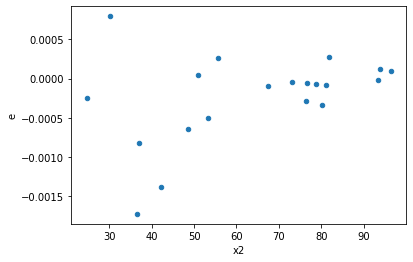

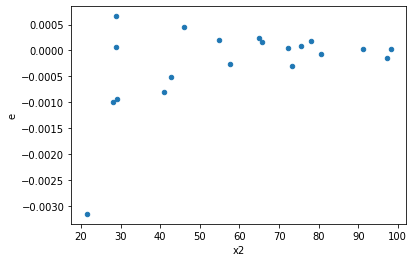

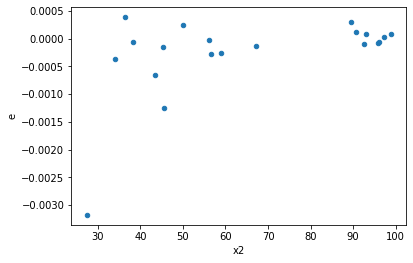

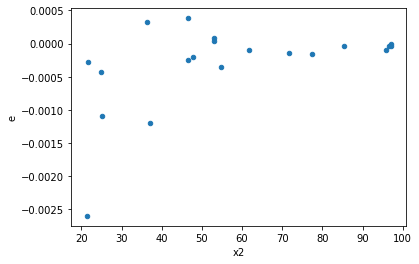

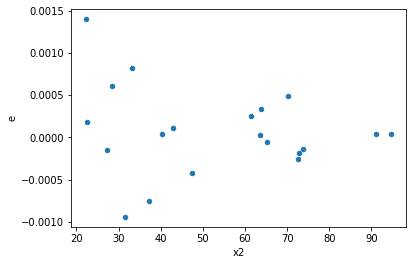

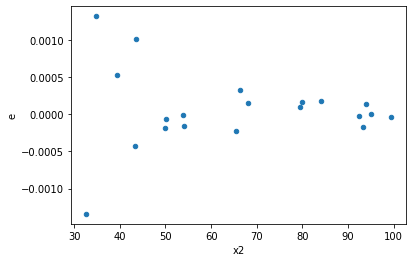

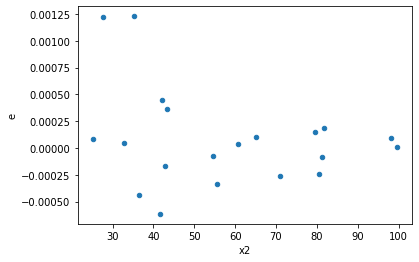

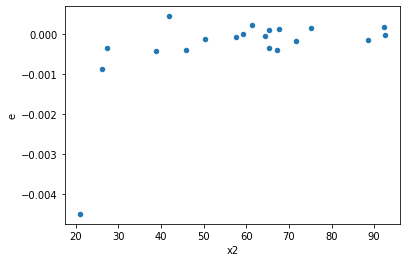

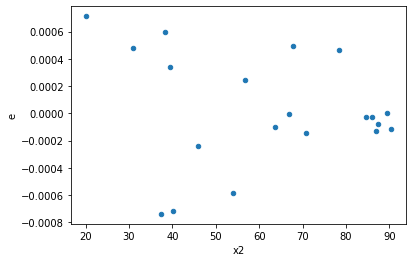

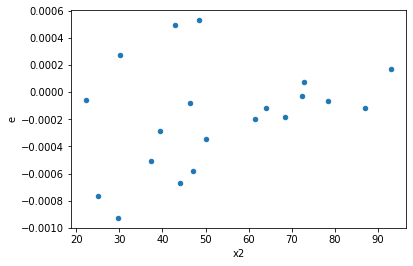

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
228.0,6.0,6.0,5.921066799643569e-08,6.713145218900415e-08,9.868444666072615e-09,1.1188575364834025e-08,1.1337729240454653,0.8827580135762267,0.5586209932118866,0.44137900678811337,Reject005=1 : Homoscedasticity
698.0,6.0,6.0,6.035427381408158e-08,2.160365975881403e-07,1.0059045635680263e-08,3.6006099598023386e-08,3.5794747237557796,0.14599541231769142,0.9270022938411543,0.07299770615884571,Reject005=1 : Homoscedasticity
708.0,6.0,6.0,2.0252377479278662e-07,2.605386397713062e-07,3.375396246546444e-08,4.3423106628551034e-08,1.286459528210344,0.7675368388989234,0.6162315805505383,0.3837684194494617,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,1.0044533022683068e-05,5.6151123790876496e-08,1.6740888371138447e-06,9.35852063181275e-09,0.005590217451032638,3.4074105351108054e-06,Reject005=0 : Heteroscedasticity
1.0,6.0,6.0,2.2099484927415005e-05,3.4119418837636616e-08,3.683247487902501e-06,5.6865698062727696e-09,0.0015439010886317335,7.309264713692204e-08,Reject005=0 : Heteroscedasticity
2.0,6.0,6.0,5.113038626306391e-06,9.251441253319303e-08,8.521731043843984e-07,1.5419068755532173e-08,0.018093822342199778,0.0001092967876598371,Reject005=0 : Heteroscedasticity
3.0,6.0,6.0,9.461149904567754e-07,8.244307304089055e-08,1.576858317427959e-07,1.3740512173481758e-08,0.087138533764366,0.009100671843526122,Reject005=0 : Heteroscedasticity
4.0,6.0,6.0,7.696653979427773e-06,6.519939544758377e-08,1.2827756632379622e-06,1.0866565907930628e-08,0.008471135070103695,1.1705127717514823e-05,Reject005=0 : Heteroscedasticity
5.0,6.0,6.0,8.481412581280905e-06,1.0793726656368056e-07,1.4135687635468173e-06,1.7989544427280094e-08,0.012726331319137332,3.8944029388715635e-05,Reject005=0 : Heteroscedasticity
6.0,6.0,6.0,2.182013424052733e-06,3.204951794702118e-08,3.6366890400878884e-07,5.3415863245035295e-09,0.014688048017364825,5.935354151661002e-05,Reject005=0 : Heteroscedasticity
7.0,6.0,6.0,1.0002988823303918e-05,2.102472307586757e-07,1.6671648038839865e-06,3.504120512644595e-08,0.021018441035229755,0.00016913085092155753,Reject005=0 : Heteroscedasticity
8.0,6.0,6.0,1.4973891068659472e-05,3.3343558076844446e-08,2.4956485114432453e-06,5.5572596794740746e-09,0.0022267797945073145,2.1863278222698492e-07,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    946
Reject005=1 : Homoscedasticity       54
Name: Result_test, dtype: int64